## Ejercicio Comparativa Redes Neuronales ANN, CNN, DNN, RNN

## Paso 1: Importar librerías necesarias

In [311]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, SimpleRNN, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np


In [10]:
!pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.12.23-py2.py3-none-any.whl.metadata (876 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   --------------

## Paso 2: Configurar parámetros y cargar el dataset

In [5]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalizar los datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Ver el tamaño de los datos
print(f"Tamaño del conjunto de entrenamiento: {x_train.shape}")
print(f"Tamaño del conjunto de prueba: {x_test.shape}")


Tamaño del conjunto de entrenamiento: (50000, 32, 32, 3)
Tamaño del conjunto de prueba: (10000, 32, 32, 3)


# REDES NEURONALES

## 1. ANN (Artificial Neural Network)

### CREAR EL MODELO

#### Flatten(input_shape=(32, 32, 3)):
Aplana las imágenes de 32x32 píxeles con 3 canales (RGB). Convierte la matriz de 3D a un vector 1D para procesarlo en las capas densas.

#### Primera capa Dense(128, activation='relu'): 
128 neuronas con activación ReLU para aprender patrones no lineales.

#### Capa de salida Dense(10, activation='softmax'):
Produce probabilidades para 10 clases. softmax asegura que la suma de las probabilidades sea 1.


In [172]:
# Crear modelo ANN
ann_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  
])


### COMPILAR MODELO

#### Optimizador Adam: 
Popular por su eficiencia y ajuste adaptativo de tasas de aprendizaje.

#### Tasa de aprendizaje (learning_rate=0.001):
Buen valor inicial. Si el modelo converge demasiado rápido o lento, ajusta este valor.

#### Pérdida sparse_categorical_crossentropy: 
Adecuado para clasificación de múltiples clases cuando las etiquetas son enteros (en lugar de one-hot encoded).

In [176]:
# Compilar el modelo ANN
ann_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']  
)


### TRAIN Y VALORAR MODELO

In [181]:

epochs = 20
batch_size = 128

history_ann = ann_model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose=2
)



Epoch 1/20
391/391 - 5s - 12ms/step - accuracy: 0.4727 - loss: 1.4921 - val_accuracy: 0.4636 - val_loss: 1.5084
Epoch 2/20
391/391 - 5s - 13ms/step - accuracy: 0.4775 - loss: 1.4806 - val_accuracy: 0.4461 - val_loss: 1.5486
Epoch 3/20
391/391 - 5s - 13ms/step - accuracy: 0.4845 - loss: 1.4680 - val_accuracy: 0.4569 - val_loss: 1.5262
Epoch 4/20
391/391 - 5s - 13ms/step - accuracy: 0.4851 - loss: 1.4589 - val_accuracy: 0.4531 - val_loss: 1.5407
Epoch 5/20
391/391 - 5s - 13ms/step - accuracy: 0.4849 - loss: 1.4596 - val_accuracy: 0.4582 - val_loss: 1.5264
Epoch 6/20
391/391 - 5s - 13ms/step - accuracy: 0.4854 - loss: 1.4531 - val_accuracy: 0.4740 - val_loss: 1.4964
Epoch 7/20
391/391 - 5s - 13ms/step - accuracy: 0.4882 - loss: 1.4473 - val_accuracy: 0.4686 - val_loss: 1.4985
Epoch 8/20
391/391 - 5s - 13ms/step - accuracy: 0.4925 - loss: 1.4375 - val_accuracy: 0.4617 - val_loss: 1.5220
Epoch 9/20
391/391 - 5s - 13ms/step - accuracy: 0.4907 - loss: 1.4379 - val_accuracy: 0.4734 - val_loss:

El modelo ANN, con su diseño simple, alcanza ~51% de precisión en entrenamiento y ~47% en validación, mostrando dificultades para capturar la complejidad de CIFAR-10. Esto se debe a su limitada capacidad para procesar características visuales complejas. Probar modelos más avanzados, como CNN, podría mejorar significativamente el rendimiento.

## 2. CNN (Convolutional Neural Network)


### Crear modelo

In [76]:
print(f"Formato de y_train: {y_train.shape}")
print(f"Ejemplo de etiquetas: {y_train[:10]}")


Formato de y_train: (50000,)
Ejemplo de etiquetas: [6 9 9 4 1 1 2 7 8 3]


#### Conv2D (32 filtros): Extrae características básicas (bordes, texturas).
#### MaxPooling2D: Reduce las dimensiones espaciales a la mitad.
#### Conv2D (64 filtros): Aprende características más detalladas.
#### Conv2D (128 filtros): Captura patrones específicos y avanzados.
#### Flatten: Convierte los datos 3D en un vector 1D.
#### Dense (256 → 128): Refina y aprende patrones de alto nivel.
#### Dense (10, softmax): Clasifica las imágenes en 10 clases con probabilidades.

In [280]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])



C:\Users\pere amat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compilar

#### optimizer=Adam(learning_rate=0.0005): 
Ajusta los pesos con Adam; tasa de aprendizaje baja para estabilidad.
#### loss='sparse_categorical_crossentropy':
Función de pérdida para clasificación multiclase con etiquetas enteras.
#### metrics=['accuracy']:
Mide el porcentaje de predicciones correctas.

In [282]:
cnn_model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Learning rate reducido
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



## TRAIN Y EVALUAR MODELO

In [284]:
epochs = 20
batch_size = 128

history = cnn_model.fit(
    x_train, y_train,               
    epochs=epochs,                
    batch_size=batch_size,          
    validation_data=(x_test, y_test), 
    verbose=2
)


Epoch 1/20
391/391 - 28s - 71ms/step - accuracy: 0.3187 - loss: 1.8211 - val_accuracy: 0.4149 - val_loss: 1.5889
Epoch 2/20
391/391 - 29s - 73ms/step - accuracy: 0.4704 - loss: 1.4511 - val_accuracy: 0.5084 - val_loss: 1.3516
Epoch 3/20
391/391 - 38s - 96ms/step - accuracy: 0.5448 - loss: 1.2676 - val_accuracy: 0.5411 - val_loss: 1.3012
Epoch 4/20
391/391 - 27s - 68ms/step - accuracy: 0.5925 - loss: 1.1495 - val_accuracy: 0.5962 - val_loss: 1.1290
Epoch 5/20
391/391 - 26s - 66ms/step - accuracy: 0.6202 - loss: 1.0750 - val_accuracy: 0.6089 - val_loss: 1.1174
Epoch 6/20
391/391 - 25s - 64ms/step - accuracy: 0.6469 - loss: 0.9981 - val_accuracy: 0.6432 - val_loss: 1.0233
Epoch 7/20
391/391 - 24s - 62ms/step - accuracy: 0.6702 - loss: 0.9427 - val_accuracy: 0.6404 - val_loss: 1.0298
Epoch 8/20
391/391 - 24s - 62ms/step - accuracy: 0.6912 - loss: 0.8787 - val_accuracy: 0.6664 - val_loss: 0.9641
Epoch 9/20
391/391 - 42s - 107ms/step - accuracy: 0.7076 - loss: 0.8325 - val_accuracy: 0.6799 -

El modelo CNN muestra un rendimiento significativamente mejor que el ANN gracias a la adición de capas convolucionales, que capturan patrones espaciales complejos en las imágenes. Con un accuracy de entrenamiento del 84.3% y una val_accuracy del 71.1%, generaliza mejor que el ANN, aunque el ligero sobreajuste indica margen para optimizar regularización.

## 3. DNN (Deep Neural Network)

##  Crear modelo DNN


#### Flatten: Convierte la imagen 32x32x3 en un vector 1D de 3072 características.
### Capas densas (Dense):
<!-- 1024 → 512 → 256 → 128 → 64 → 32: Reduce gradualmente la dimensionalidad, aprendiendo patrones jerárquicos. -->
Cada capa usa ReLU para capturar relaciones no lineales.
#### Capa de salida (Dense(10, softmax)): Clasifica en 10 clases con probabilidades.

In [115]:
dnn_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax') 
])

## Compilar

#### optimizer=Adam(learning_rate=0.001): 
Adam ajusta eficientemente los pesos con una tasa estándar.
#### loss='sparse_categorical_crossentropy':
Pérdida para clasificación multiclase con etiquetas enteras.
#### metrics=['accuracy']
: Mide el porcentaje de predicciones correctas

In [118]:
dnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

## TRAIN Y EVALUAR MODELO

In [121]:
dnn_history = dnn_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

dnn_loss, dnn_accuracy = dnn_model.evaluate(x_test, y_test)
print(f"DNN - Pérdida: {dnn_loss:.4f}, Precisión: {dnn_accuracy:.4f}")


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.2084 - loss: 2.0999 - val_accuracy: 0.3475 - val_loss: 1.7930
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.3564 - loss: 1.7738 - val_accuracy: 0.3740 - val_loss: 1.7258
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.3900 - loss: 1.6880 - val_accuracy: 0.4360 - val_loss: 1.5927
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.4250 - loss: 1.6035 - val_accuracy: 0.4393 - val_loss: 1.5558
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.4472 - loss: 1.5374 - val_accuracy: 0.4702 - val_loss: 1.4953
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.4725 - loss: 1.4824 - val_accuracy: 0.4771 - val_loss: 1.4796
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.4840 - loss: 1.4475 - val_accuracy: 0.4847 - val_loss: 1.4584
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5016 - loss: 1.3984 - 


El modelo DNN alcanza un 61.7% de precisión en entrenamiento pero solo un 51% en validación, indicando sobreajuste. Las capas densas no capturan bien la complejidad visual de CIFAR-10

## 4. RNN (Recurrent Neural Network)

## 1. Transformar y preprocesar los datos

In [123]:

x_train_rnn = x_train.reshape((x_train.shape[0], 32, 96)) 
x_test_rnn = x_test.reshape((x_test.shape[0], 32, 96))

x_train_rnn = x_train_rnn / 255.0
x_test_rnn = x_test_rnn / 255.0

print(f"Nueva forma de los datos: {x_train_rnn.shape}")


Nueva forma de los datos: (50000, 32, 96)


## 2. Modelo RNN mejorado con SIMPLERNN

## CREAR MODELO

### Capas Recurrentes (SimpleRNN):

Tres capas con 256, 128, y 64 unidades procesan secuencias temporales.
Solo la última capa devuelve el resumen de la secuencia.
### Capas Densas (Dense):

Tres capas densas (256, 128, 64) refinan las características aprendidas.
### La última capa (Dense(10, softmax)) clasifica en 10 clases.

In [306]:
rnn_model = Sequential([
    SimpleRNN(256, activation='relu', input_shape=(32, 96), return_sequences=True),
    SimpleRNN(128, activation='relu', return_sequences=True),
    SimpleRNN(64, activation='relu', return_sequences=False),  
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

rnn_model.summary()



C:\Users\pere amat\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_15 (SimpleRNN)            │ (None, 32, 256)             │          90,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_16 (SimpleRNN)            │ (None, 32, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_17 (SimpleRNN)            │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_109 (Dense)                    │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 210,442 (822.04 KB)

 Trainable params: 210,442 (822.04 KB)

 Non-trainable params: 0 (0.00 B)

## COMPILAR MODELO

In [308]:
from tensorflow.keras.optimizers import Adam
rnn_model.compile(
    optimizer=Adam(learning_rate=0.0005),  
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy'] 
)


## TRAIN Y EVALUAR MODELO

In [310]:
epochs = 20
batch_size = 128

history_rnn = rnn_model.fit(
    x_train_rnn, y_train,             
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_test_rnn, y_test), 
    verbose=2
)


Epoch 1/20
391/391 - 64s - 164ms/step - accuracy: 0.1566 - loss: 2.2174 - val_accuracy: 0.2281 - val_loss: 2.0617
Epoch 2/20
391/391 - 50s - 128ms/step - accuracy: 0.2554 - loss: 1.9700 - val_accuracy: 0.2823 - val_loss: 1.8865
Epoch 3/20
391/391 - 28s - 72ms/step - accuracy: 0.2864 - loss: 1.8763 - val_accuracy: 0.3147 - val_loss: 1.8194
Epoch 4/20
391/391 - 28s - 73ms/step - accuracy: 0.3116 - loss: 1.8209 - val_accuracy: 0.3245 - val_loss: 1.7885
Epoch 5/20
391/391 - 41s - 106ms/step - accuracy: 0.3389 - loss: 1.7592 - val_accuracy: 0.3461 - val_loss: 1.7361
Epoch 6/20
391/391 - 41s - 104ms/step - accuracy: 0.3553 - loss: 1.7171 - val_accuracy: 0.3656 - val_loss: 1.6928
Epoch 7/20
391/391 - 24s - 60ms/step - accuracy: 0.3750 - loss: 1.6734 - val_accuracy: 0.3904 - val_loss: 1.6470
Epoch 8/20
391/391 - 42s - 106ms/step - accuracy: 0.3865 - loss: 1.6519 - val_accuracy: 0.4053 - val_loss: 1.6153
Epoch 9/20
391/391 - 27s - 69ms/step - accuracy: 0.3984 - loss: 1.6243 - val_accuracy: 0.41

El modelo RNN alcanza solo un 46.5% de precisión en entrenamiento y 46.3% en validación, mostrando un rendimiento limitado. Esto se debe a que las RNN no están diseñadas para datos visuales, como las imágenes de CIFAR-10, y consumen más tiempo en entrenamiento.

In [150]:
# Evaluar el modelo RNN
test_loss_rnn, test_accuracy_rnn = rnn_model.evaluate(x_test_rnn, y_test, verbose=0)

# Mostrar resultados de evaluación
print(f"Resultados del modelo RNN:")
print(f"Pérdida en el conjunto de prueba: {test_loss_rnn:.4f}")
print(f"Precisión en el conjunto de prueba: {test_accuracy_rnn:.4f}")


Resultados del modelo RNN:
Pérdida en el conjunto de prueba: 1.5494
Precisión en el conjunto de prueba: 0.4247


### Comparación de Rendimiento

In [183]:
# Evaluar el modelo ANN
test_loss_ann, test_accuracy_ann = ann_model.evaluate(x_test, y_test, verbose=0)

# Mostrar los resultados
print(f"ANN - Pérdida en prueba: {test_loss_ann:.4f}")
print(f"ANN - Precisión en prueba: {test_accuracy_ann:.4f}")


ANN - Pérdida en prueba: 1.5008
ANN - Precisión en prueba: 0.4665


In [166]:
# Evaluar el modelo DNN
test_loss_dnn, test_accuracy_dnn = dnn_model.evaluate(x_test, y_test, verbose=0)

# Mostrar los resultados de evaluación
print(f"DNN - Pérdida en prueba: {test_loss_dnn:.4f}")
print(f"DNN - Precisión en prueba: {test_accuracy_dnn:.4f}")


DNN - Pérdida en prueba: 1.4579
DNN - Precisión en prueba: 0.5092


In [285]:
# Evaluar el modelo CNN
test_loss_cnn, test_accuracy_cnn = cnn_model.evaluate(x_test, y_test, verbose=0)

# Mostrar los resultados de evaluación
print(f"CNN - Pérdida en prueba: {test_loss_cnn:.4f}")
print(f"CNN - Precisión en prueba: {test_accuracy_cnn:.4f}")


CNN - Pérdida en prueba: 0.9303
CNN - Precisión en prueba: 0.7113


In [312]:
# Evaluar el modelo RNN
test_loss_rnn, test_accuracy_rnn = rnn_model.evaluate(x_test_rnn, y_test, verbose=0)

# Mostrar los resultados de evaluación
print(f"RNN - Pérdida en prueba: {test_loss_rnn:.4f}")
print(f"RNN - Precisión en prueba: {test_accuracy_rnn:.4f}")


RNN - Pérdida en prueba: 1.4580
RNN - Precisión en prueba: 0.4638


### Curvas de Aprendizaje

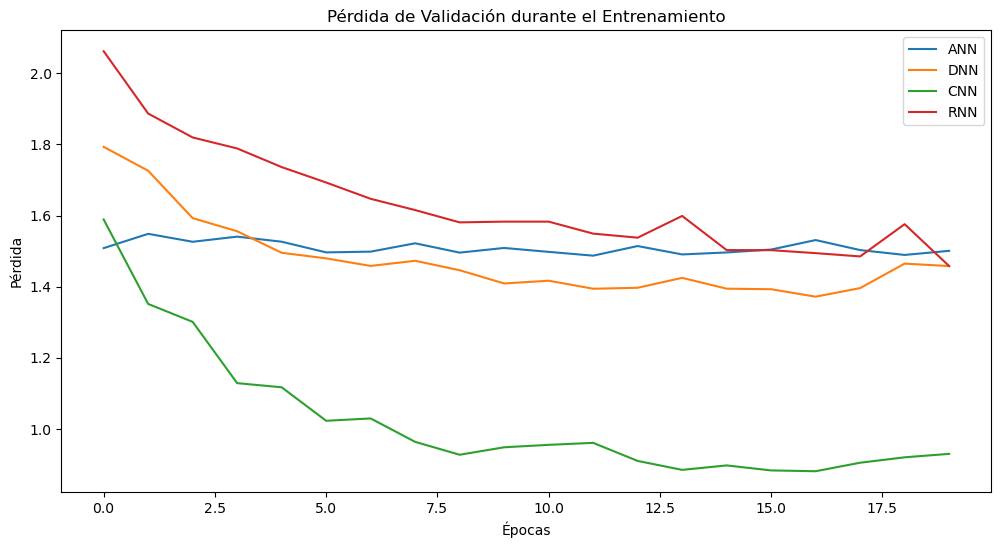

In [316]:
plt.figure(figsize=(12, 6))

# Graficar pérdida de validación de cada modelo
plt.plot(history_ann.history['val_loss'], label='ANN')
plt.plot(dnn_history.history['val_loss'], label='DNN')
plt.plot(history.history['val_loss'], label='CNN')
plt.plot(history_rnn.history['val_loss'], label='RNN')

# Configuración del gráfico
plt.title('Pérdida de Validación durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


El gráfico muestra la pérdida de validación para los modelos ANN, DNN, CNN y RNN durante el entrenamiento. Se observa que CNN tiene la menor pérdida, indicando mejor generalización en comparación con los otros modelos. El RNN comienza con la pérdida más alta y converge lentamente, mostrando un rendimiento inferior. ANN y DNN tienen un comportamiento intermedio, pero no alcanzan la efectividad de CNN.

## Conclusiones

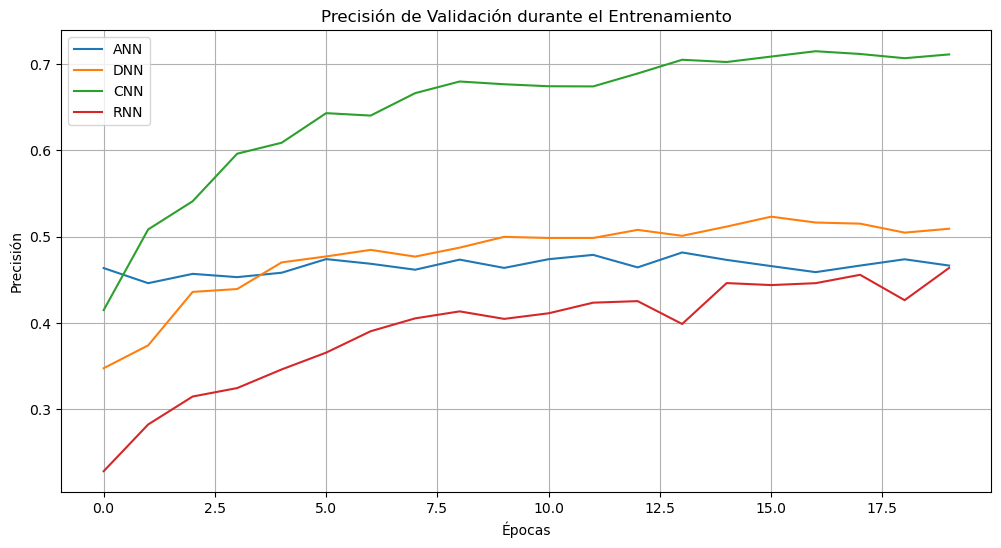

In [318]:
plt.figure(figsize=(12, 6))

plt.plot(history_ann.history['val_accuracy'], label='ANN')
plt.plot(dnn_history.history['val_accuracy'], label='DNN')
plt.plot(history.history['val_accuracy'], label='CNN')
plt.plot(history_rnn.history['val_accuracy'], label='RNN')

plt.title('Precisión de Validación durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()



El gráfico muestra que CNN es el mejor modelo, alcanzando una precisión de validación del 70%, gracias a su capacidad para capturar patrones espaciales. ANN y DNN tienen un rendimiento moderado (50%), mientras que RNN es el menos efectivo (45%), ya que no está optimizado para datos de imágenes.

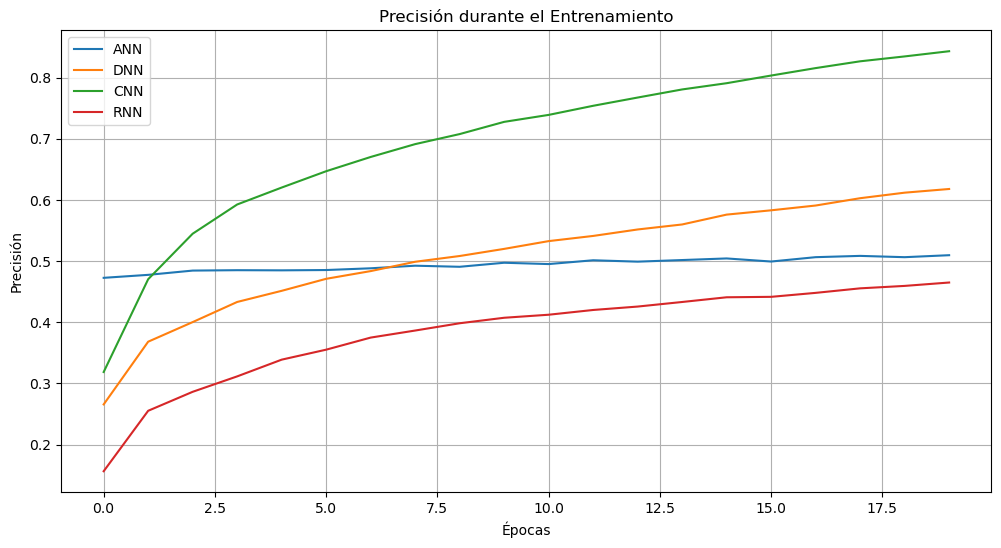

In [320]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(history_ann.history['accuracy'], label='ANN')
plt.plot(dnn_history.history['accuracy'], label='DNN')
plt.plot(history.history['accuracy'], label='CNN')
plt.plot(history_rnn.history['accuracy'], label='RNN')

plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()


El gráfico muestra que CNN es el mejor modelo, con una precisión superior al 80% gracias a su capacidad para captar patrones visuales complejos. DNN llega al 60%, mientras que ANN y RNN tienen un rendimiento más limitado (50% y 45%, respectivamente). CNN es claramente el más adecuado para imágenes.

# CONCLUSIÓN FINAL

En resumen, el modelo CNN es el más adecuado para CIFAR-10, logrando más del 70% de precisión en validación y 80% en entrenamiento, gracias a su capacidad para procesar patrones visuales complejos. DNN y ANN funcionan de manera aceptable (50-60%), pero no alcanzan el nivel de CNN. Por otro lado, RNN tiene el peor desempeño (45%), ya que está diseñado para datos secuenciales y no para imágenes. Para tareas de clasificación de imágenes, CNN es claramente la mejor opción.